In [1]:
import jax
import os
import jax.numpy as jnp
import numpy as np
from jax import random
import time
import pickle
import matplotlib.pyplot as plt

In [3]:
if os.path.isdir('datasets/8fmsk'):
    pass
else:
    os.system('mkdir datasets/8fmsk')

### Dataset generation
Sampling rate 20 kHz


8 equally distant MFSK symbols, one noise signal

Freqeuencies offset according to uniform distribution, with 1 \% to their central distribution

Power has gone through ideal AGC so strength of received signal is equal to one.

Noise will be at Carrier Noise Density ratio 15 dB

Number of waveforms per frequnecy = 1000


In [ ]:
sampling_rate = 20e3
frequnecies = jnp.arange(0, 10e3, 1250)
relative_frequency_offset = 0.01
frequency_offset = relative_frequency_offset * frequnecies
samples = int(sampling_rate)
CNO =  30
num_waveforms = 1000

t = jnp.linspace(0, 1, samples)

waveforms = []

key = random.PRNGKey(time.time_ns())



for idx, freq in enumerate(frequnecies):
    for i in range(num_waveforms):
        key, subkey = random.split(key)
        phase = random.uniform(key, shape=(1,), minval=0, maxval=2*jnp.pi)
        waveforms.append((jnp.sqrt(2)*jnp.sin(2*jnp.pi*(freq+random.uniform(subkey, 1, minval=-frequency_offset[idx]/2,maxval=frequency_offset[idx]/2))*t + phase), idx))
for i in range(num_waveforms):
    waveforms.append((jnp.zeros(samples), 8))

# Add noise

waveforms_with_noise = []  

for waveform in waveforms:
    key, subkey = random.split(key)
    waveforms_with_noise.append((waveform[0] + jax.random.normal(subkey, shape=(samples))*jnp.sqrt(sampling_rate/2*1/10**(CNO/10)), waveform[1]))

# Normalize waveforms to power 1
waveforms_with_noise = [(waveform[0]/jnp.sqrt(jnp.mean(waveform[0]**2)), waveform[1]) for waveform in waveforms_with_noise]

# Save waveforms
with open('datasets/8fmsk/waveforms_uniform_CNO.pkl', 'wb') as f:
    pickle.dump(waveforms_with_noise, f)

Array([   0., 1250., 2500., 3750., 5000., 6250., 7500., 8750.], dtype=float32)

In [6]:

# Calculate mean power of all waveforms
print(type(waveforms_with_noise[1001][0]))
print(jnp.mean(waveforms_with_noise[0][0]**2))
mean_power = [jnp.mean(x[0]**2) for x in waveforms_with_noise]
plt.plot(mean_power)

<class 'jaxlib.xla_extension.ArrayImpl'>
1.0000001


KeyboardInterrupt: 

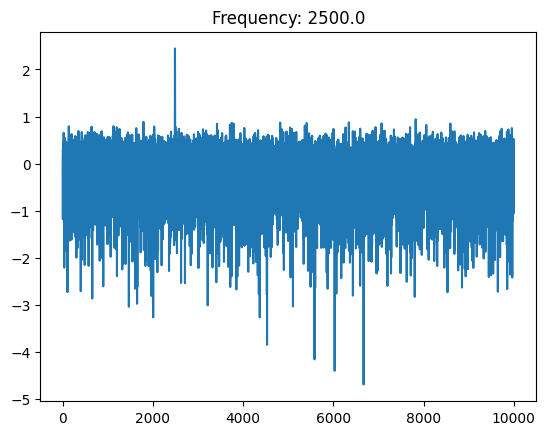

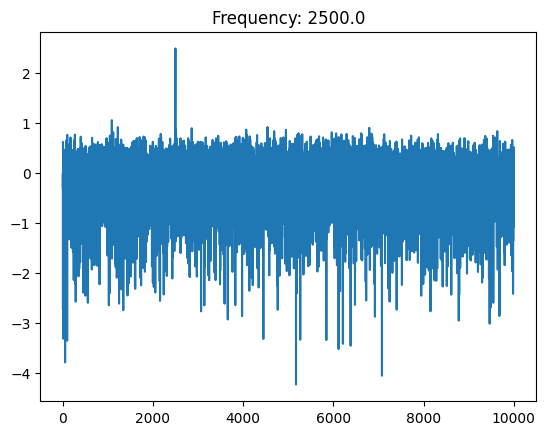

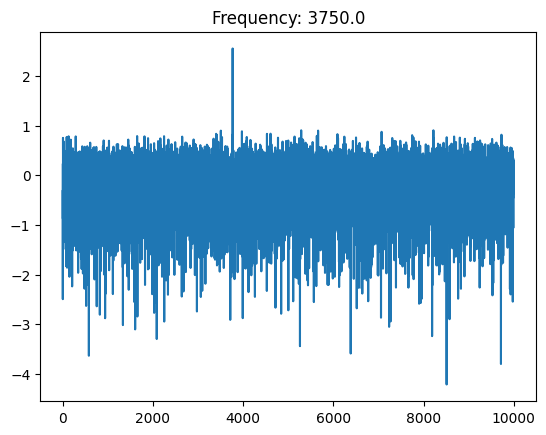

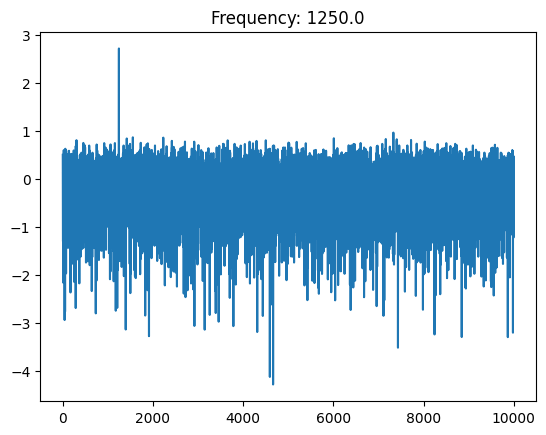

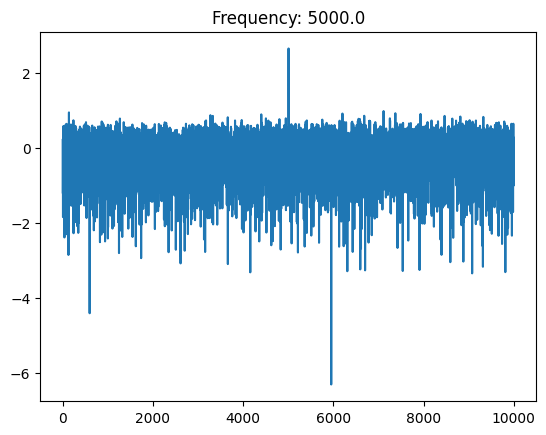

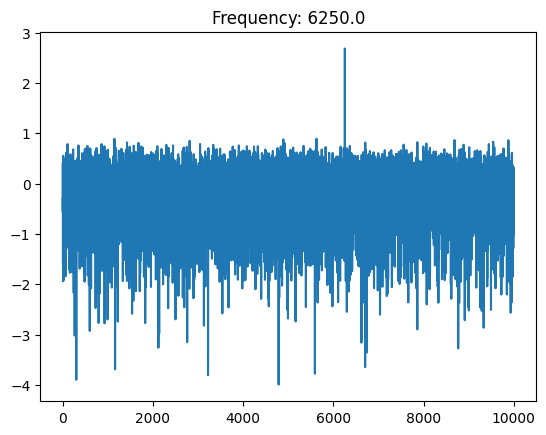

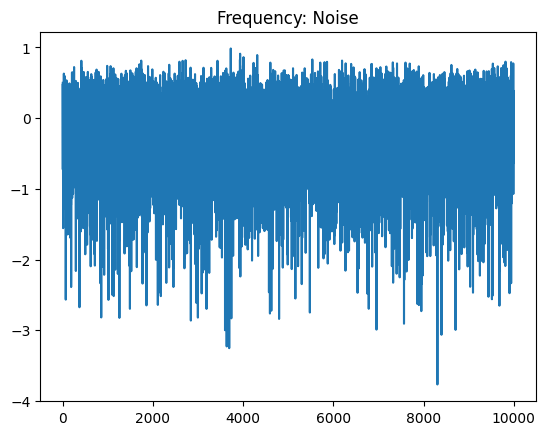

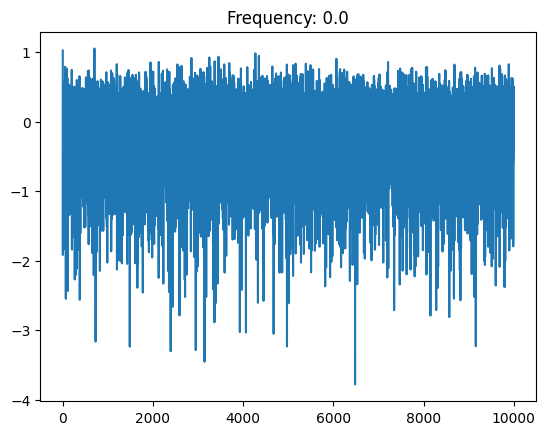

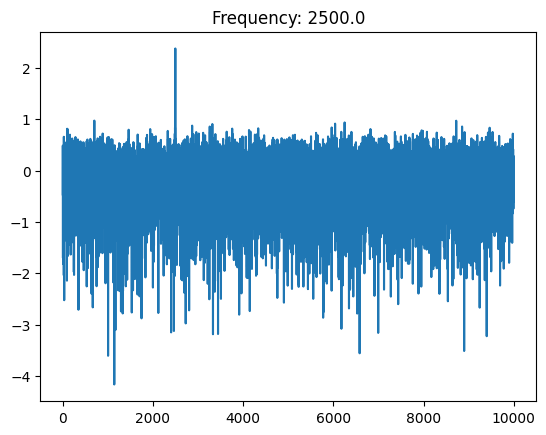

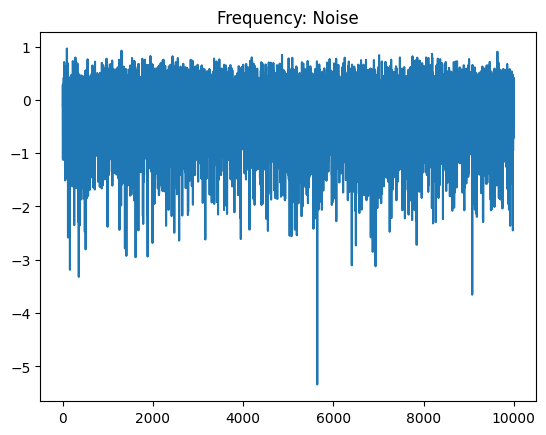

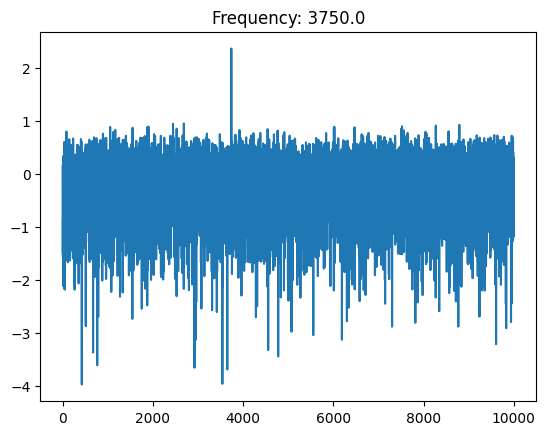

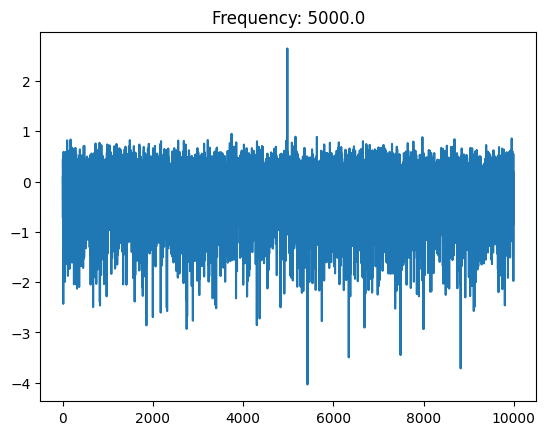

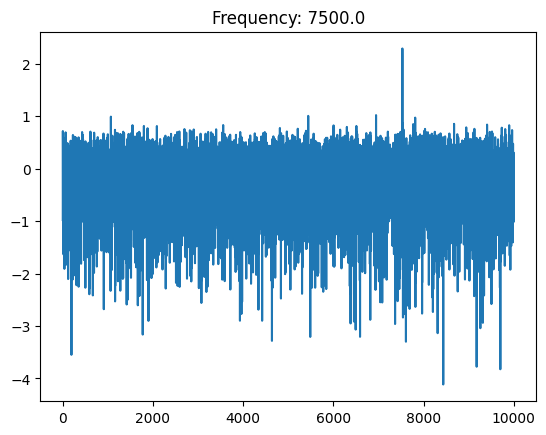

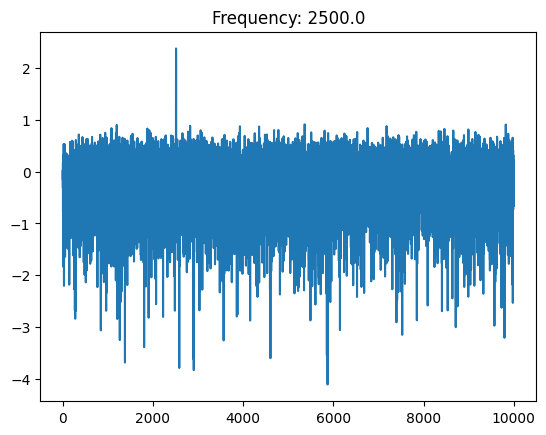

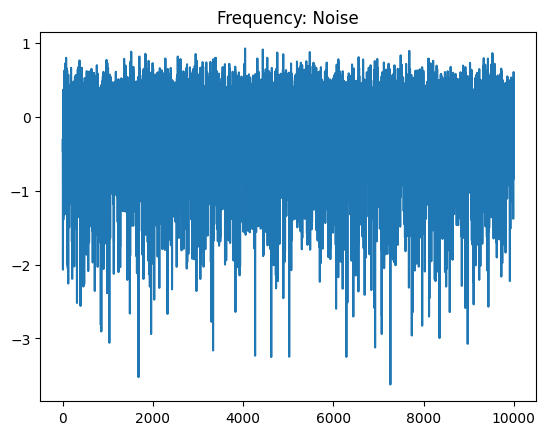

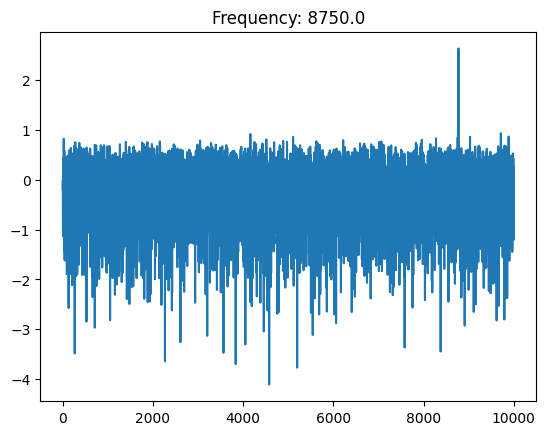

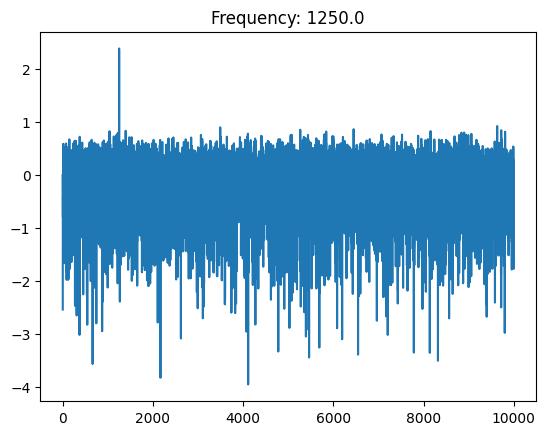

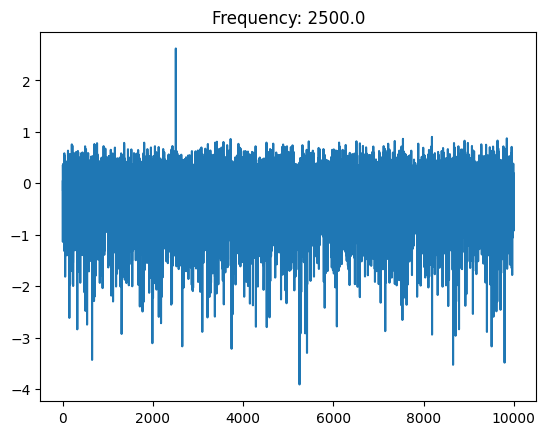

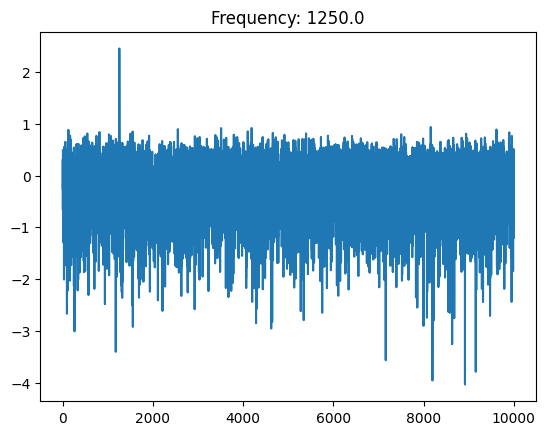

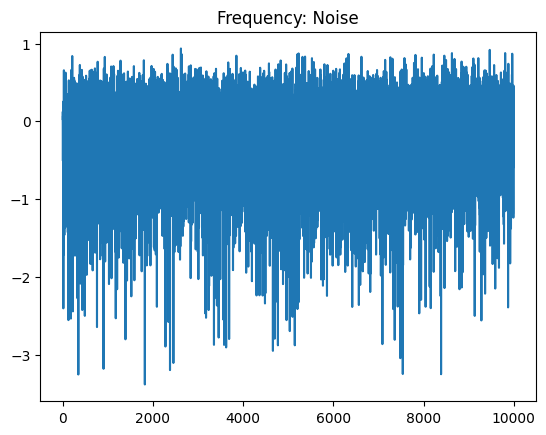

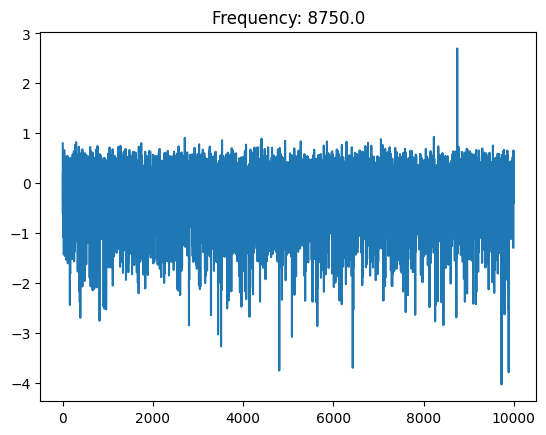

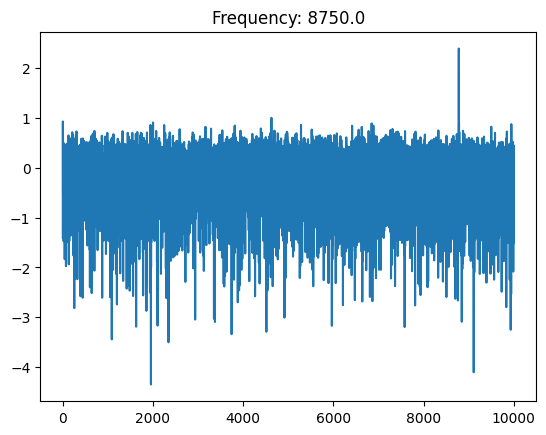

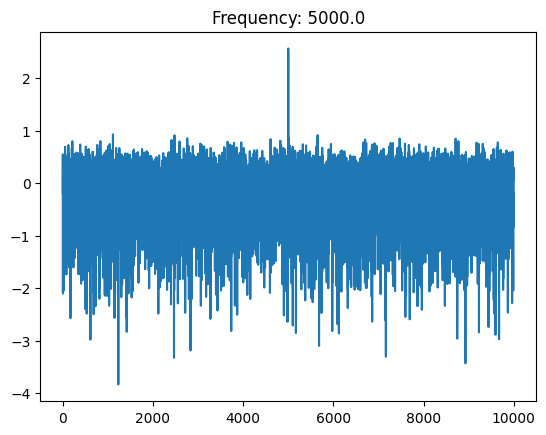

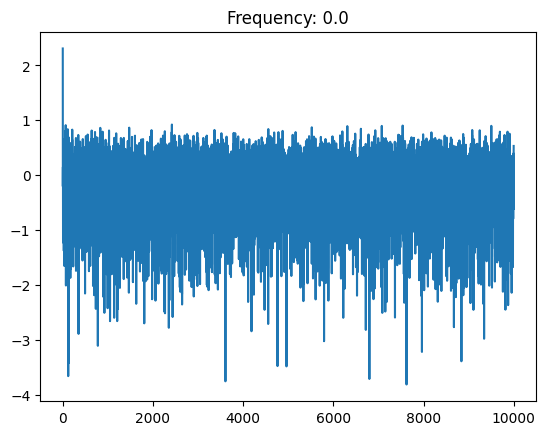

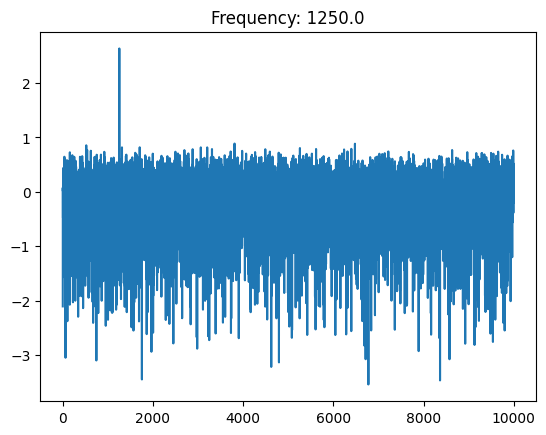

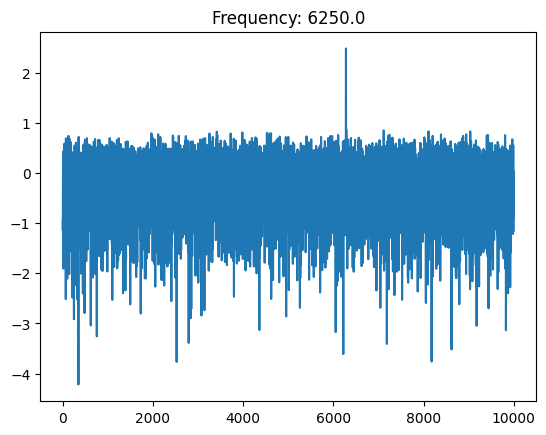

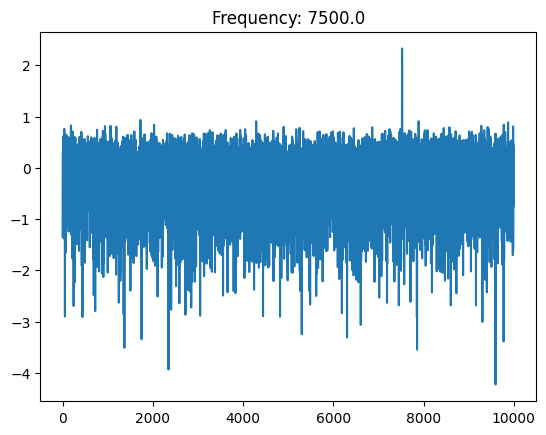

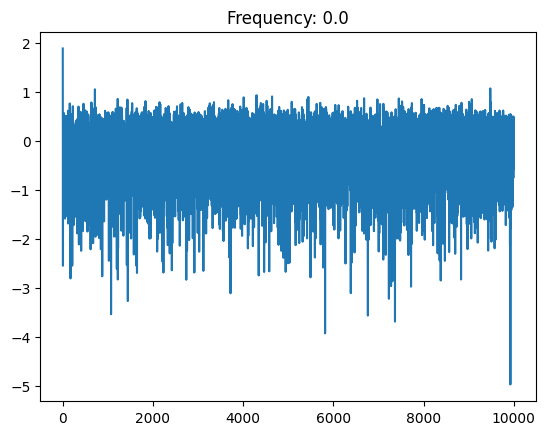

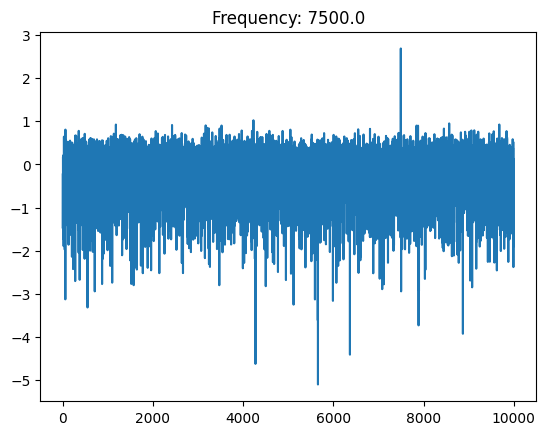

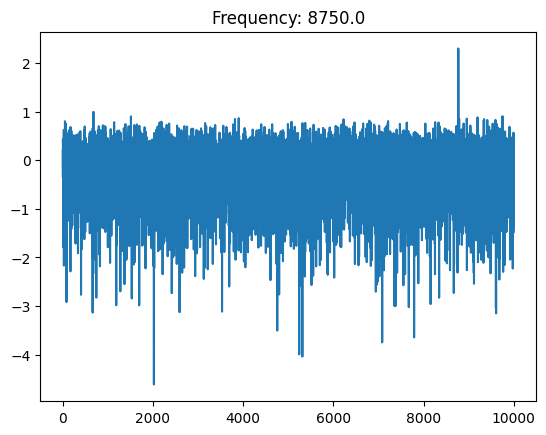

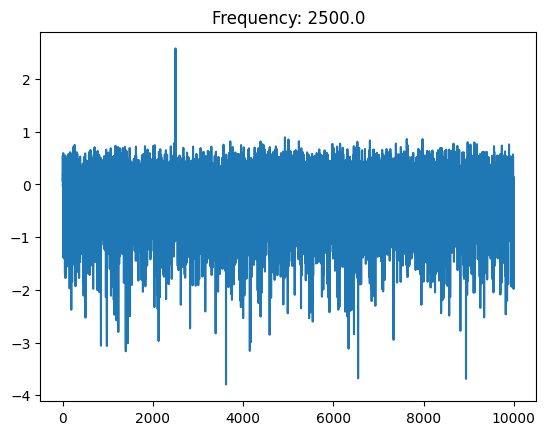

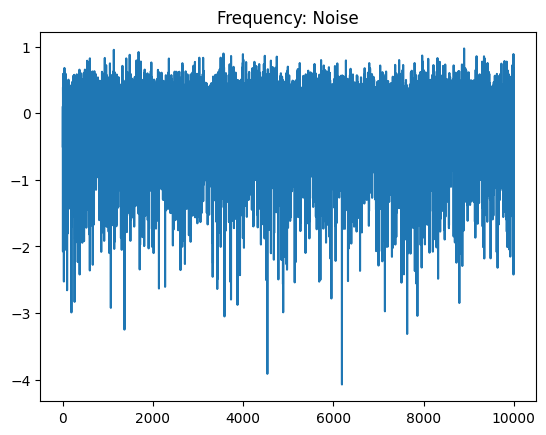

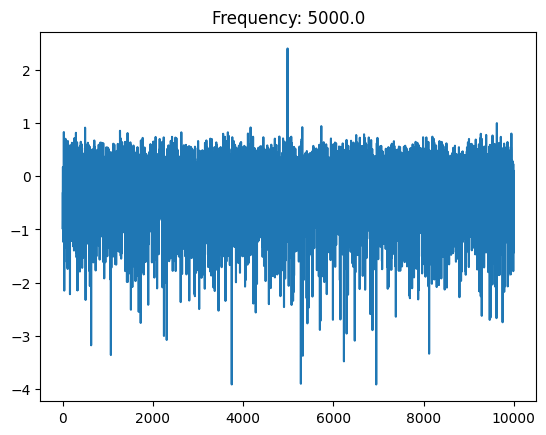

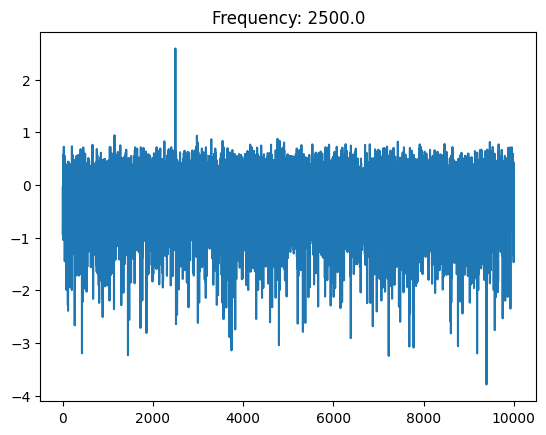

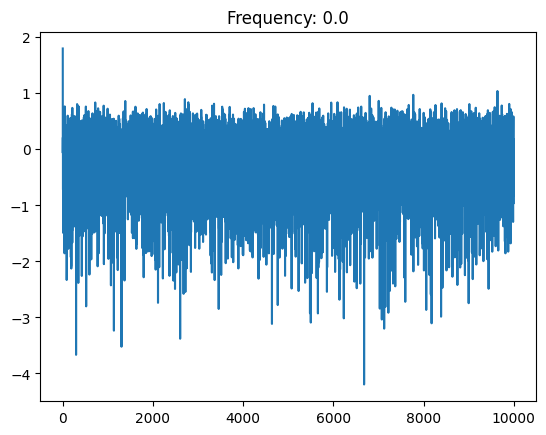

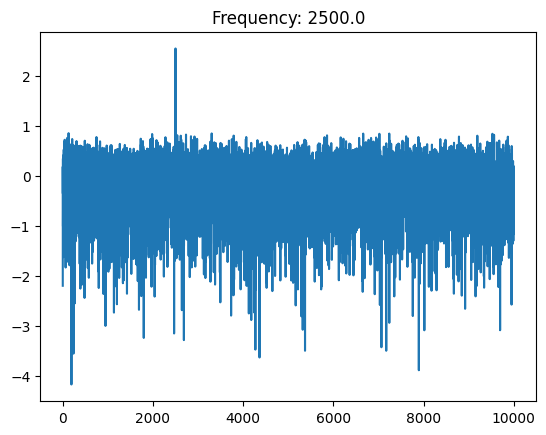

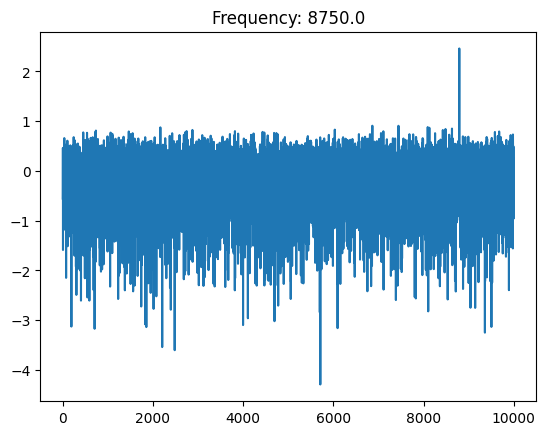

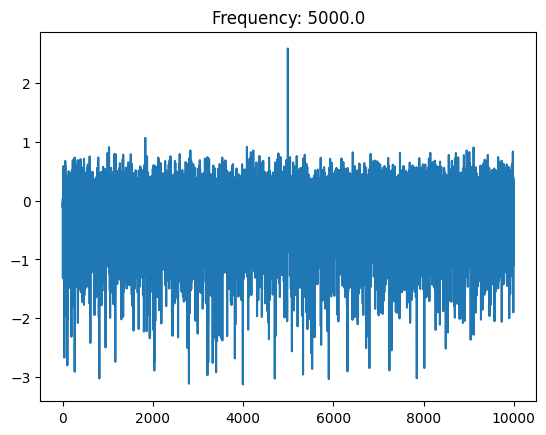

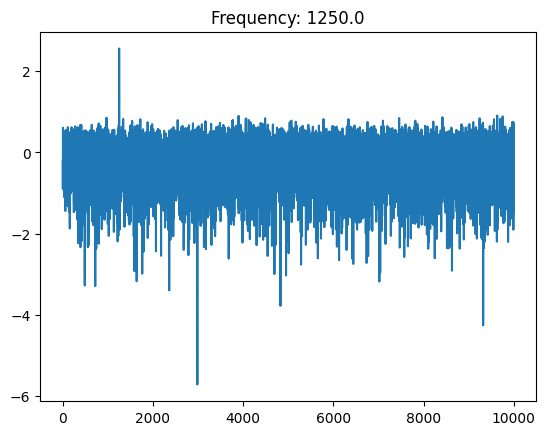

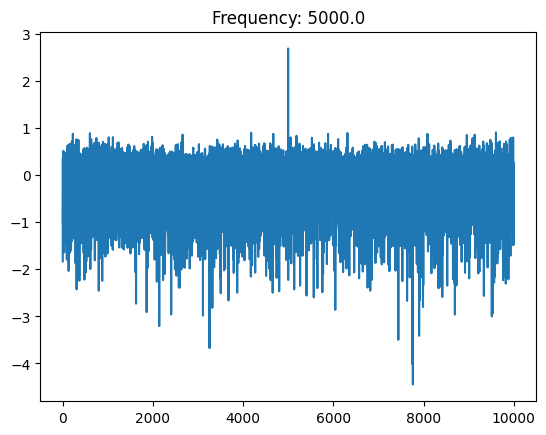

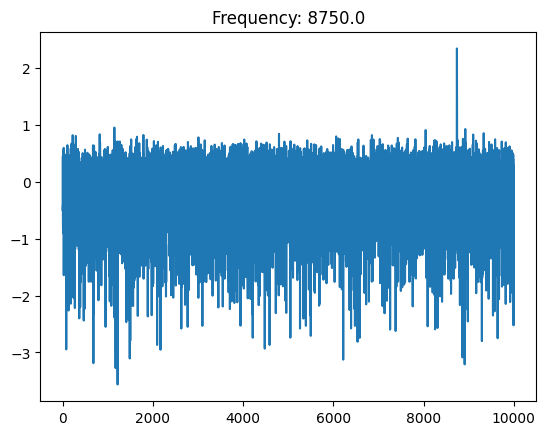

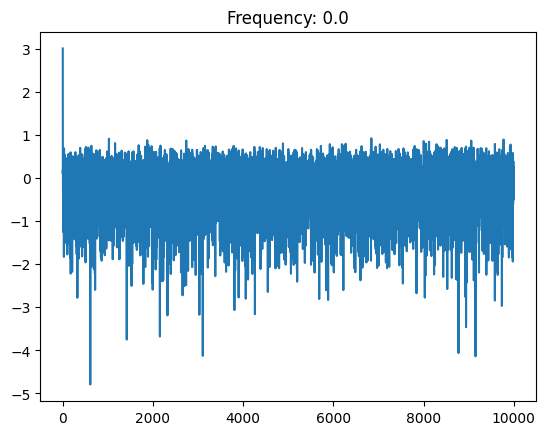

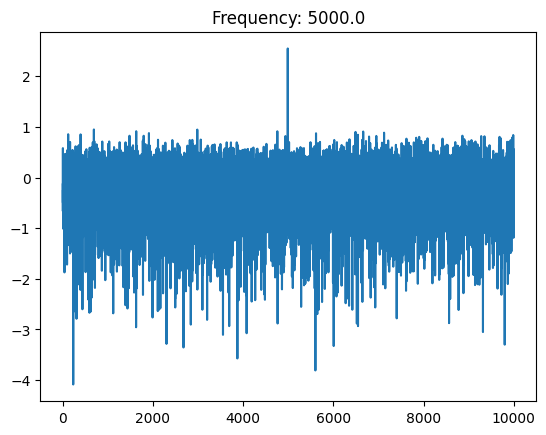

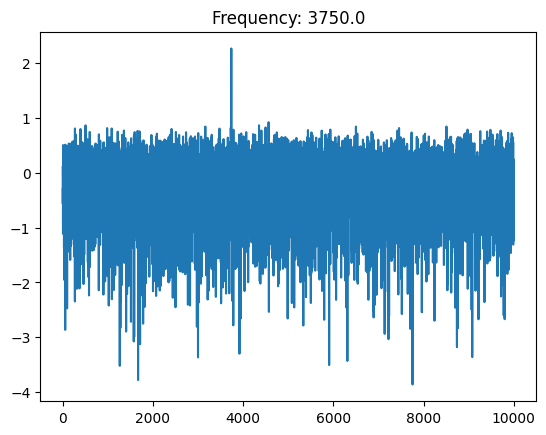

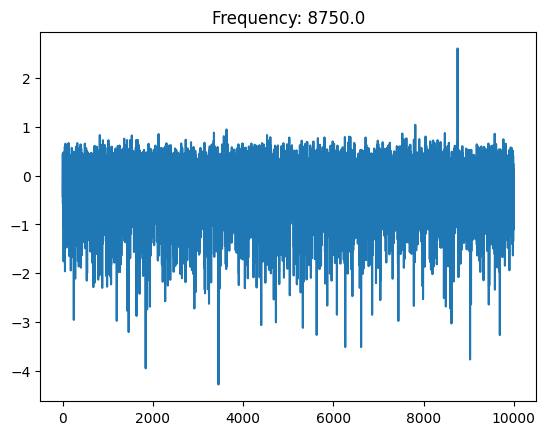

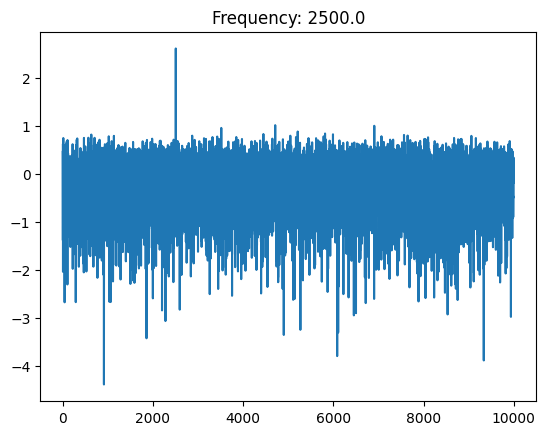

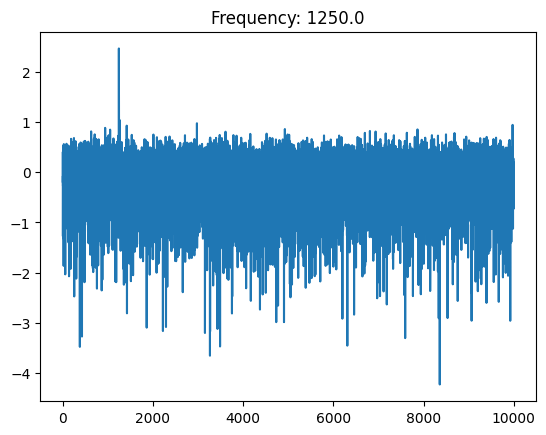

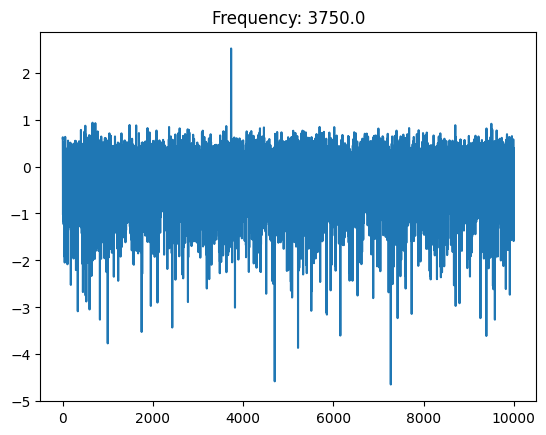

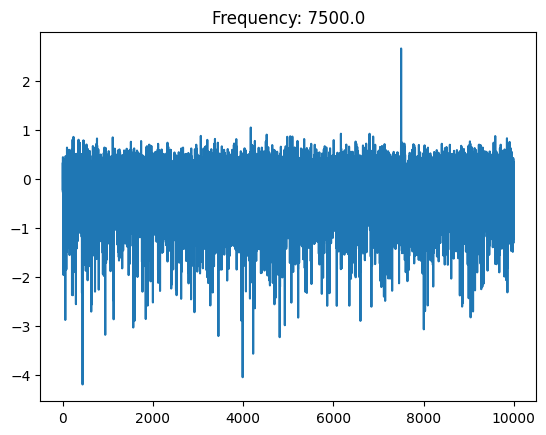

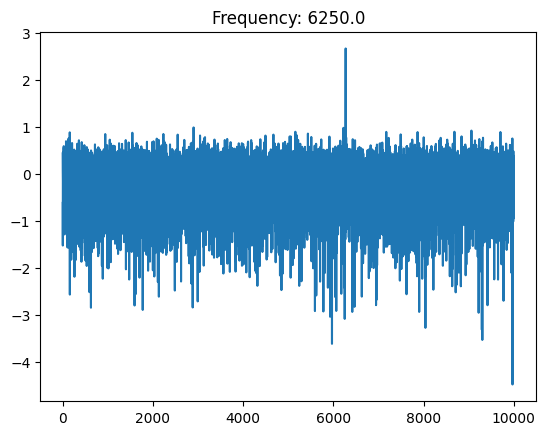

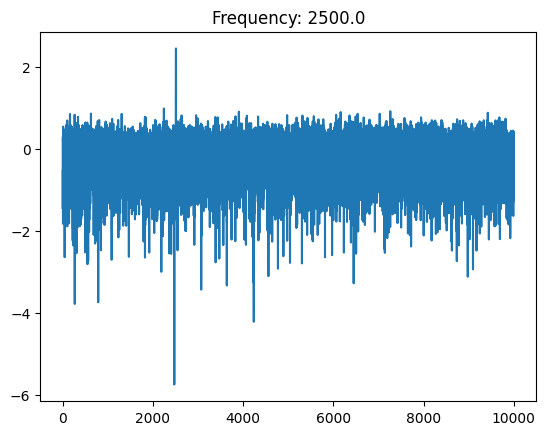

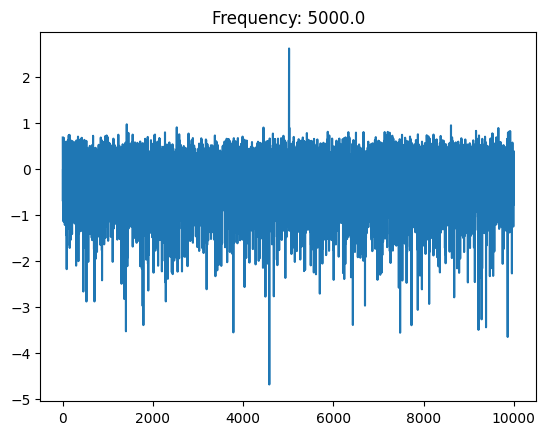

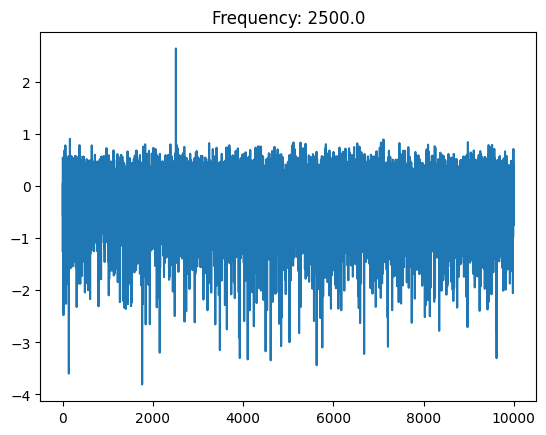

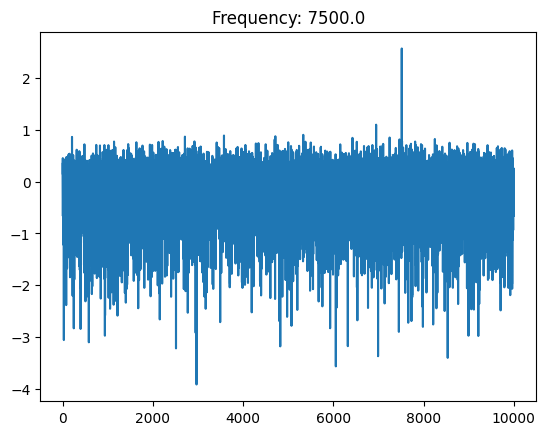

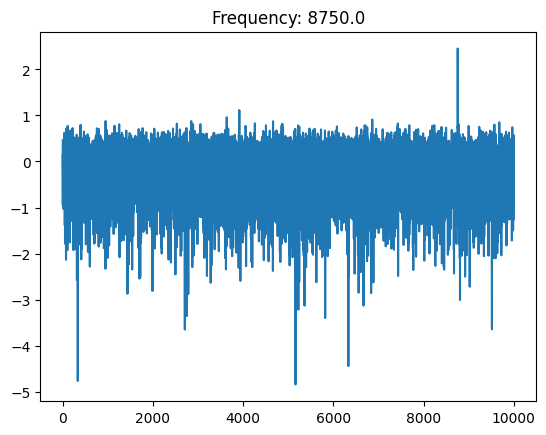

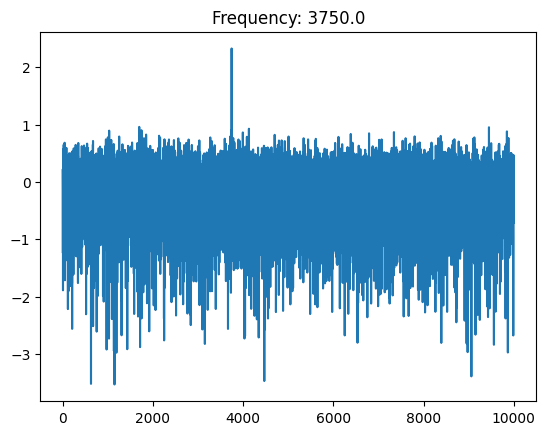

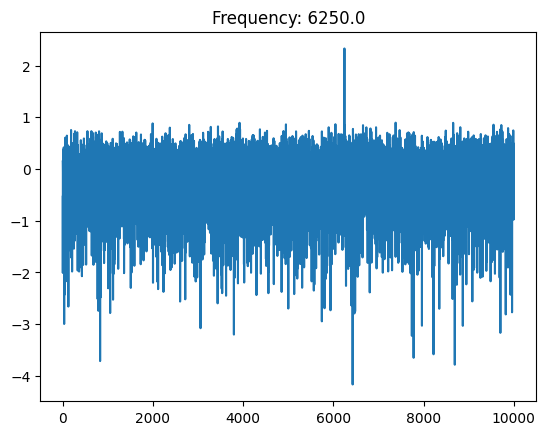

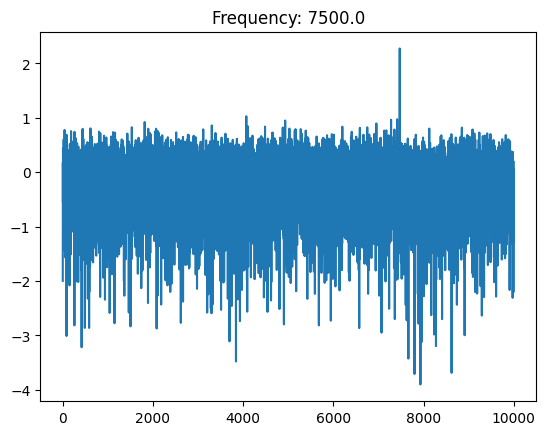

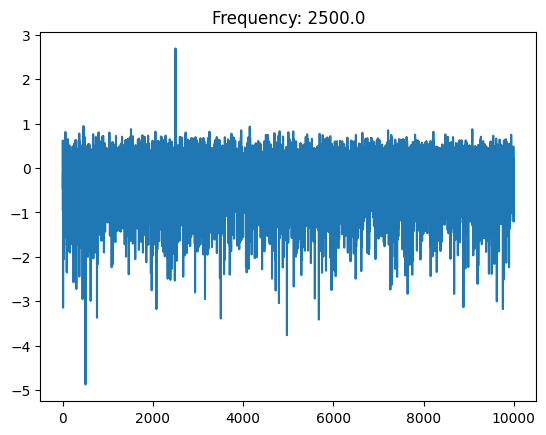

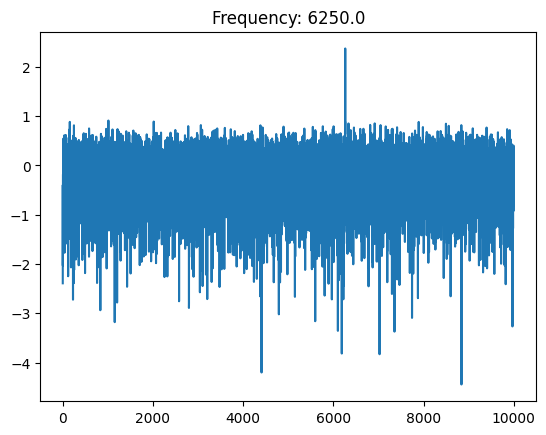

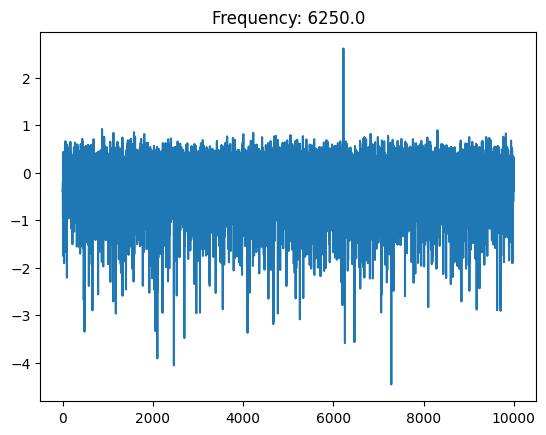

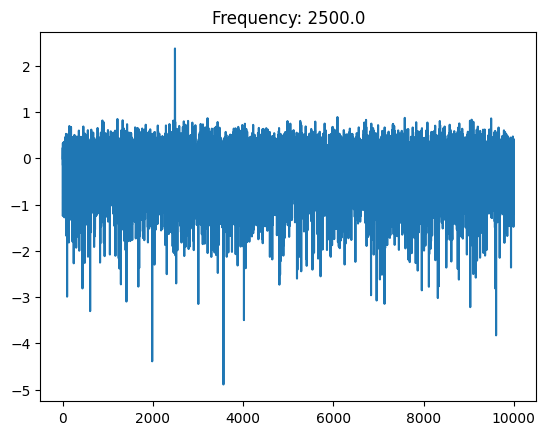

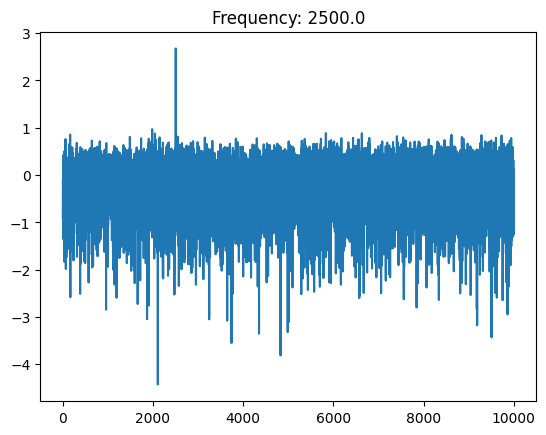

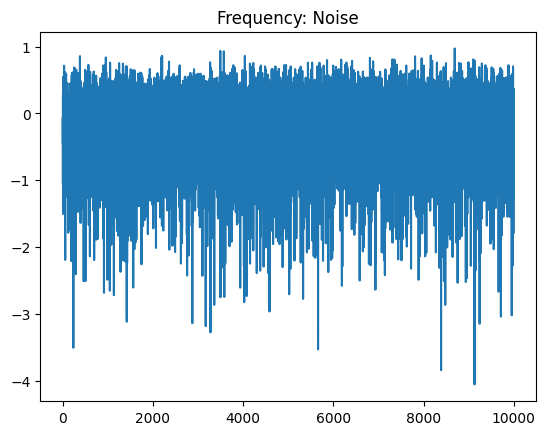

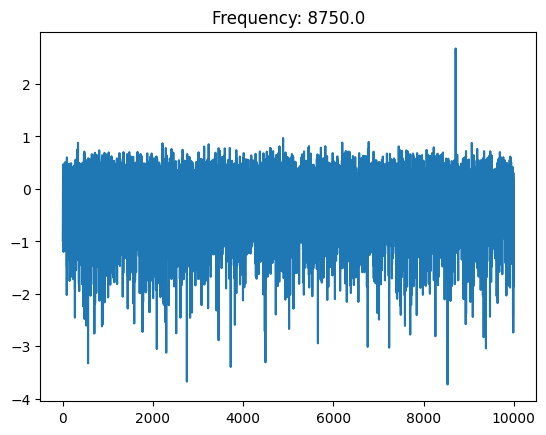

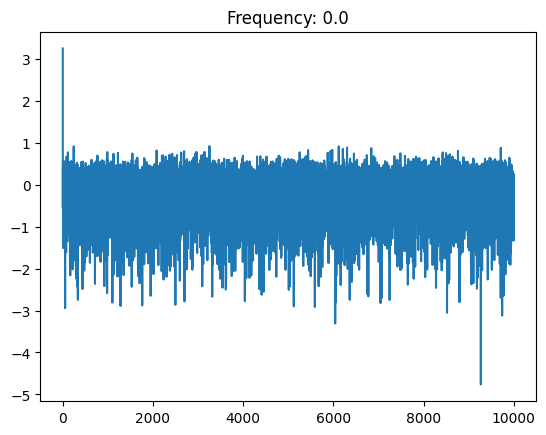

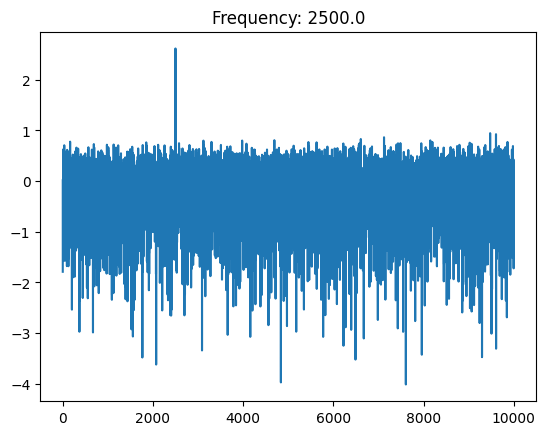

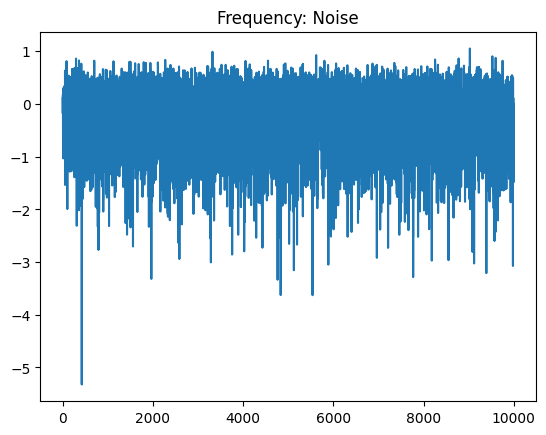

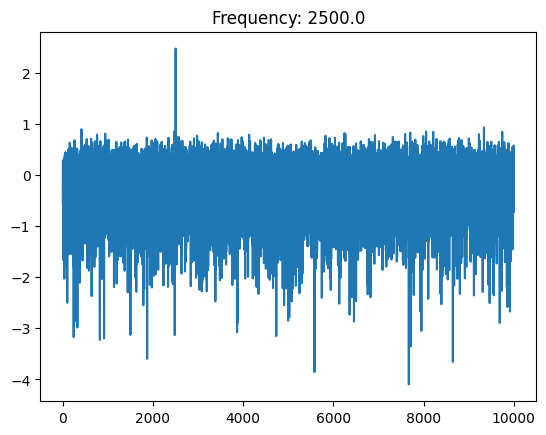

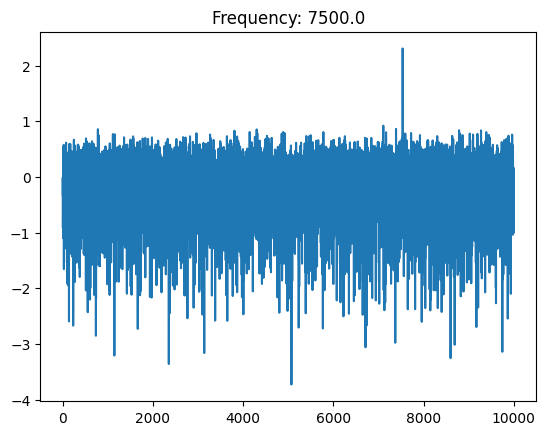

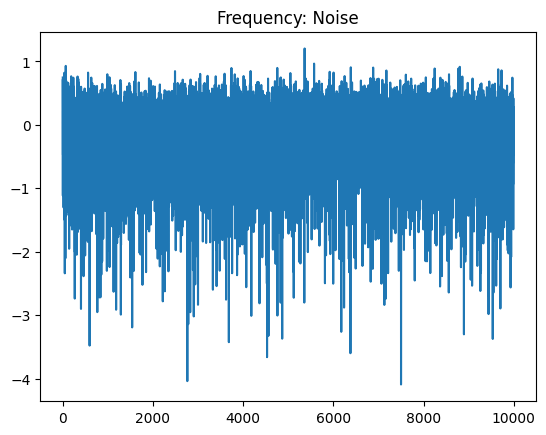

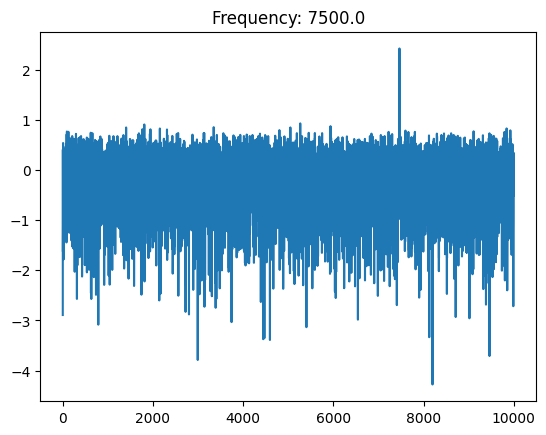

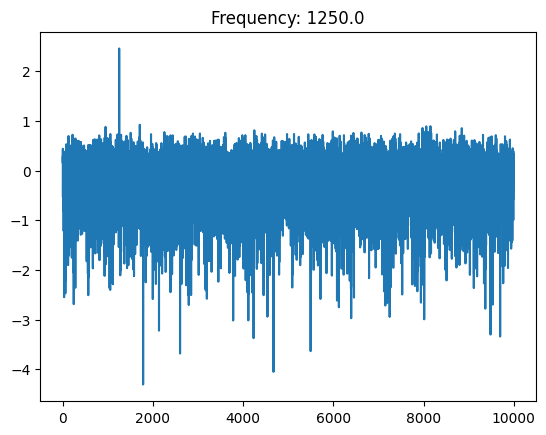

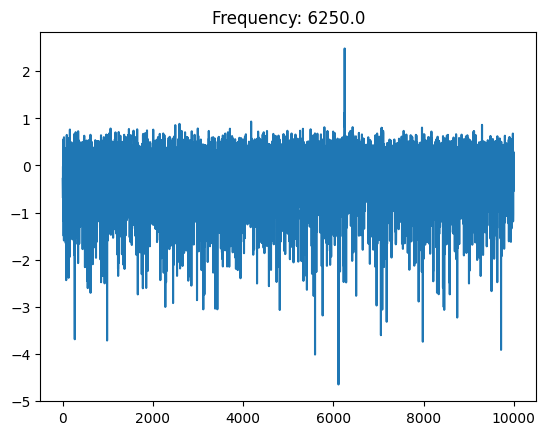

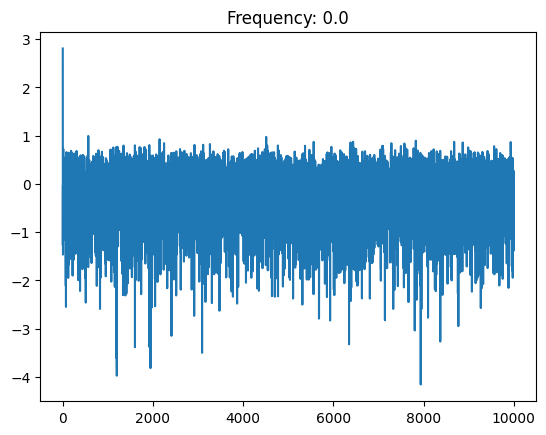

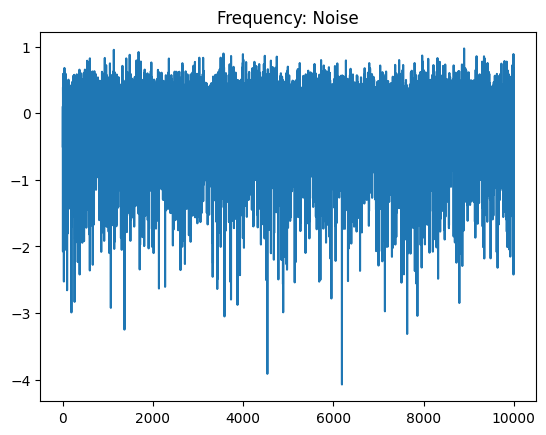

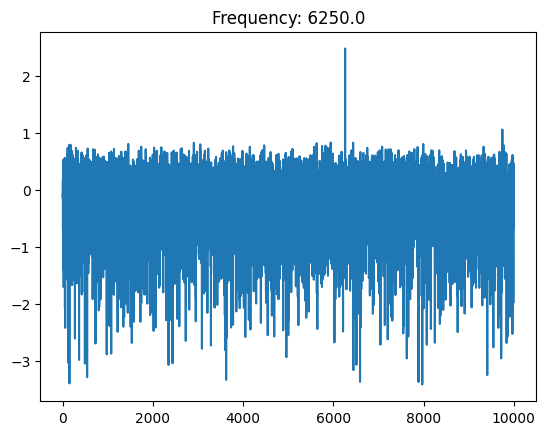

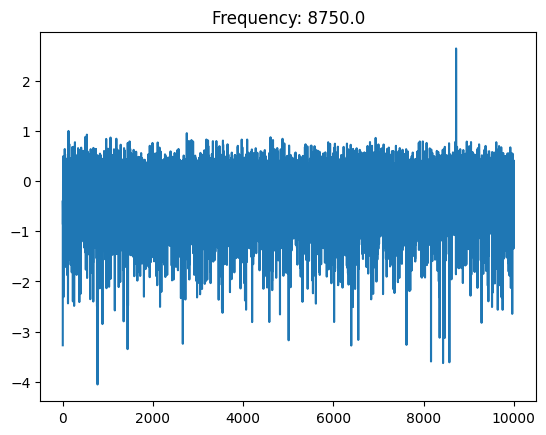

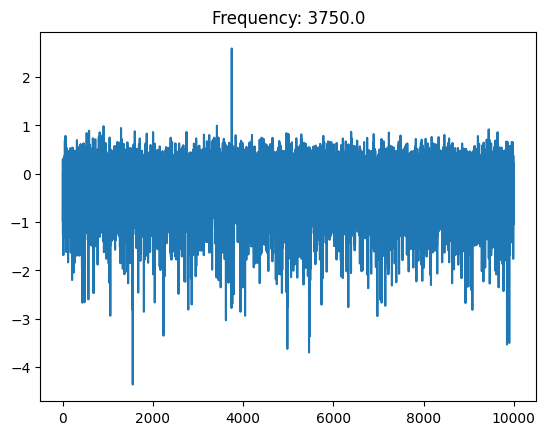

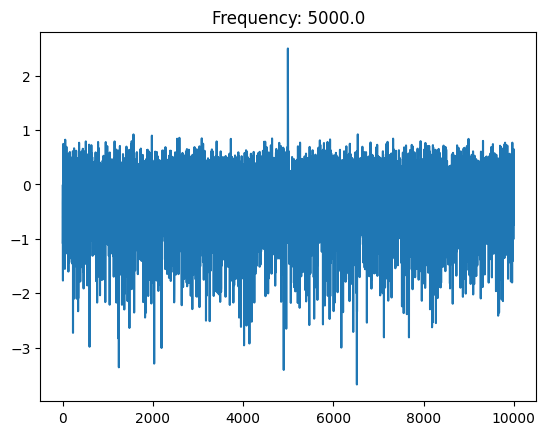

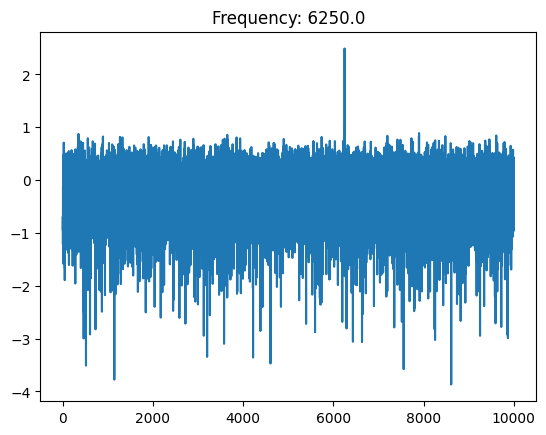

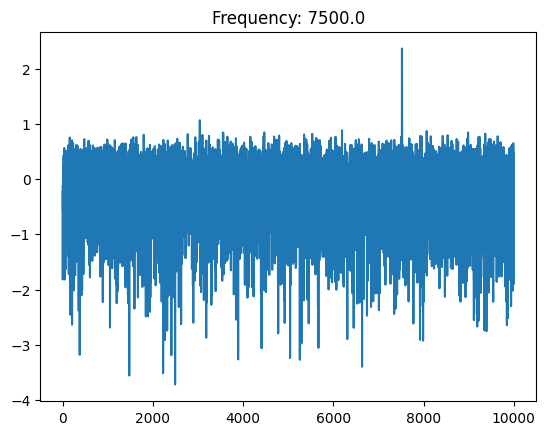

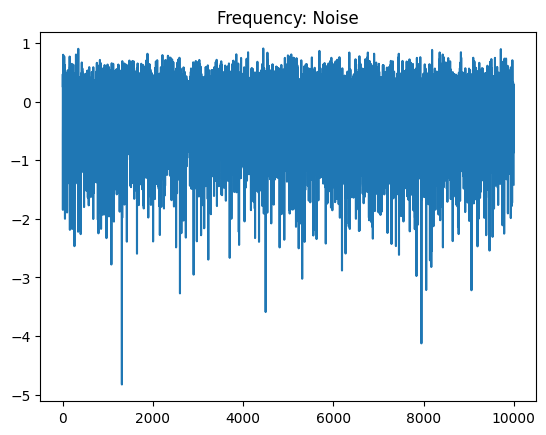

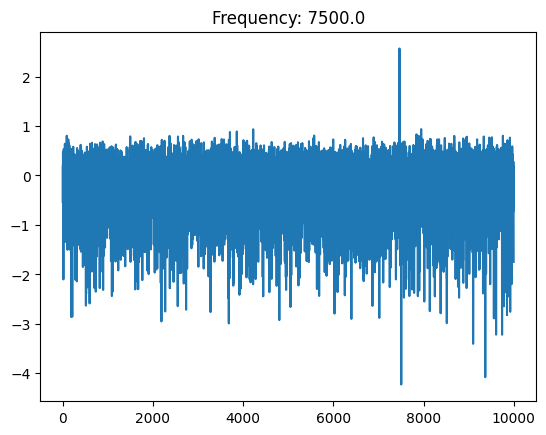

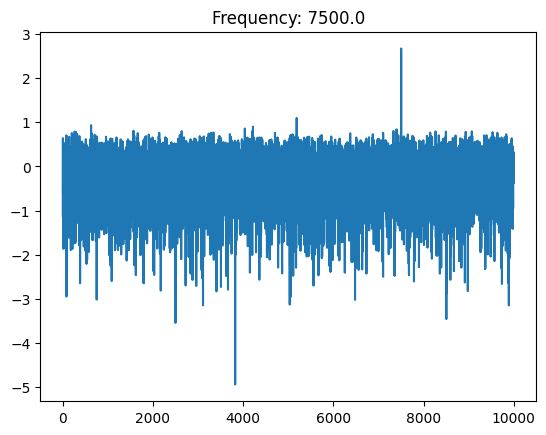

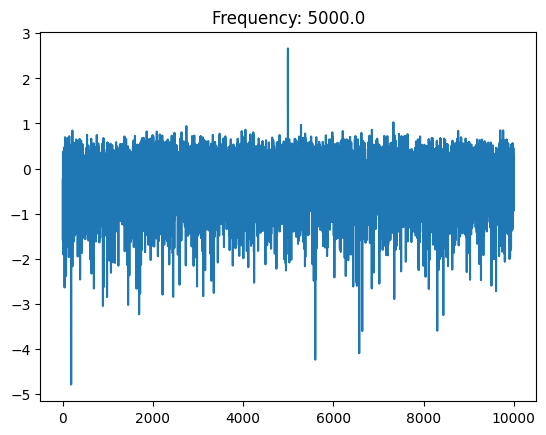

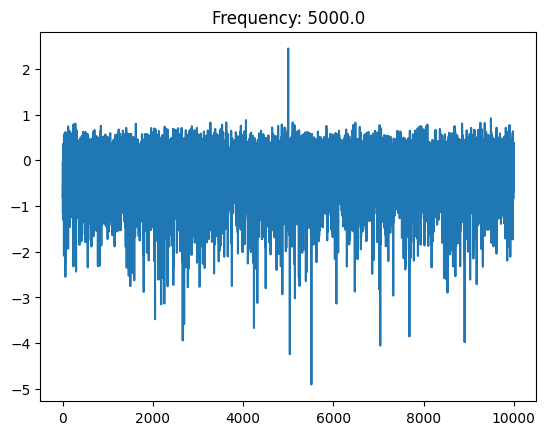

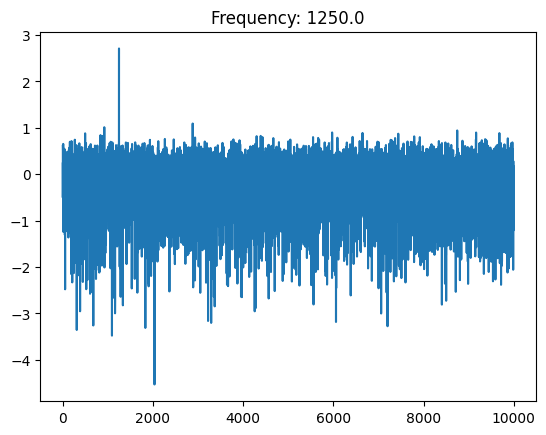

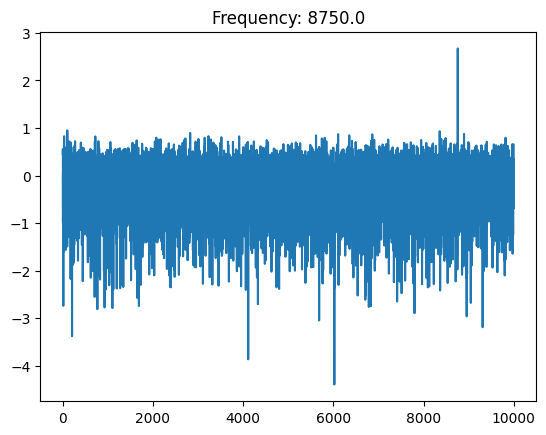

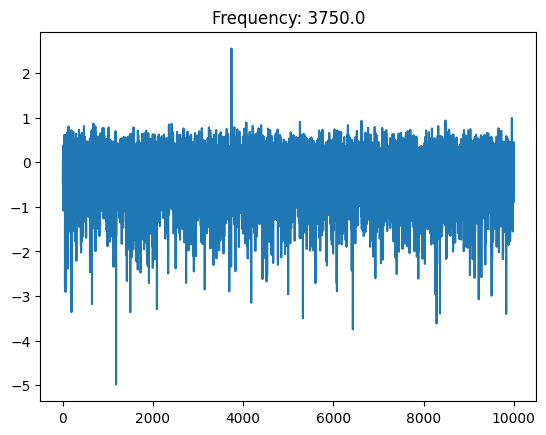

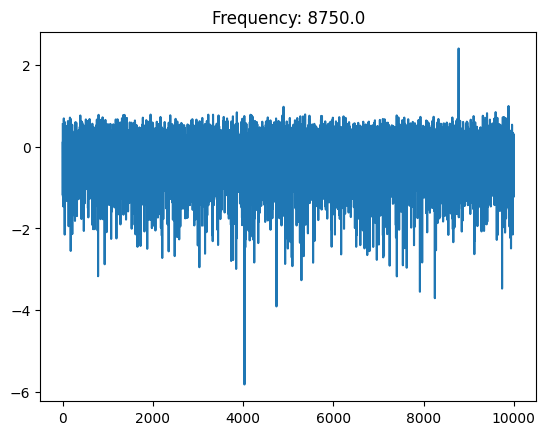

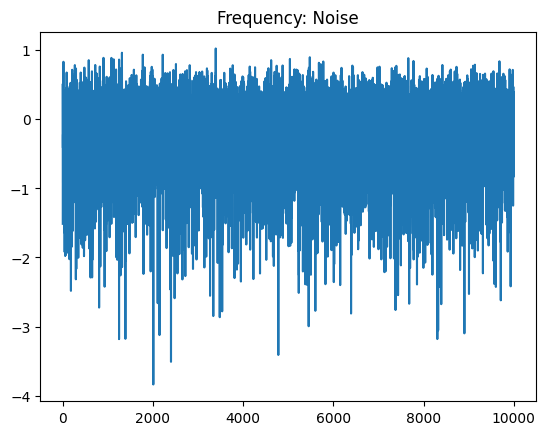

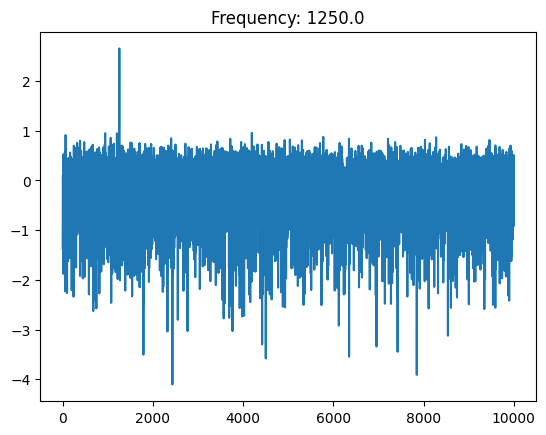

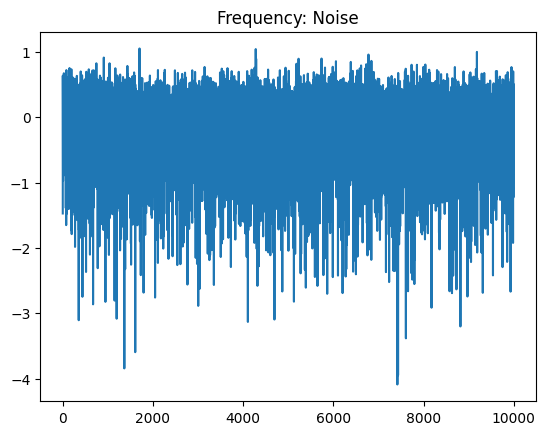

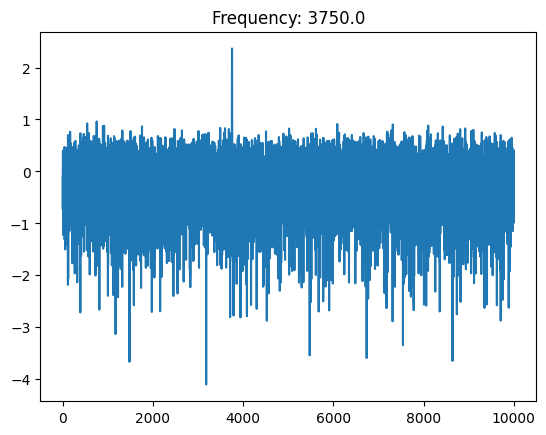

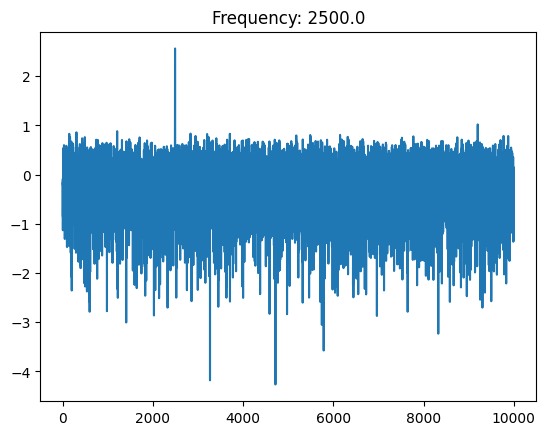

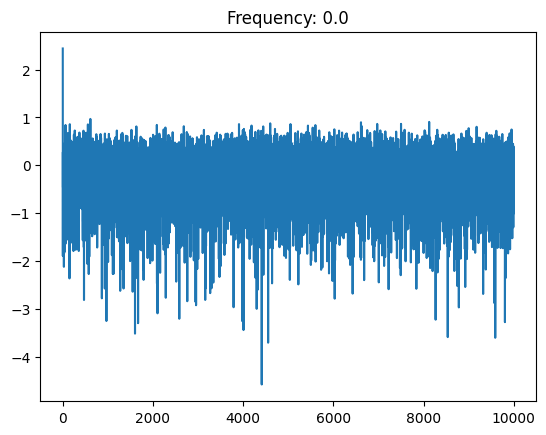

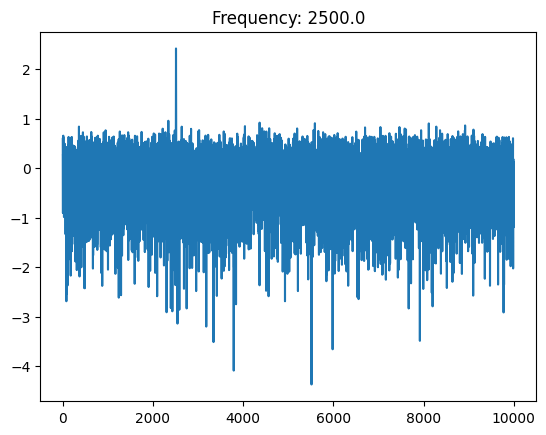

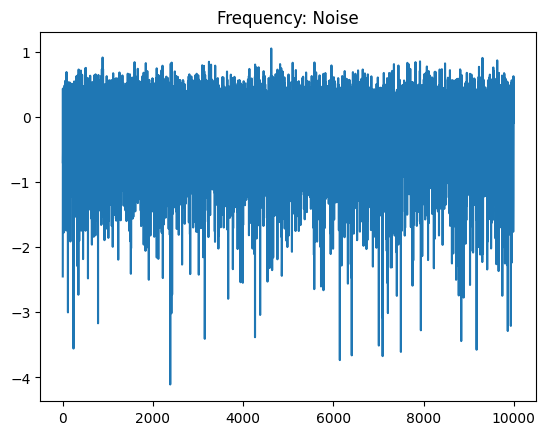

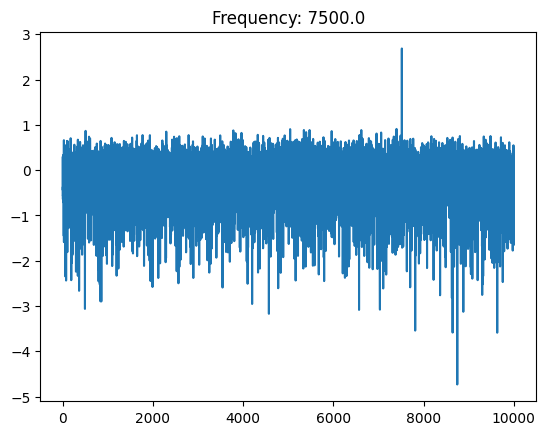

In [14]:
# Verify 100 random waveforms from the dataset by doing fft plot

for i in range(100):
    k = np.random.choice(len(waveforms_with_noise))
    plt.figure()
    plt.plot(jnp.log10(jnp.abs(jnp.fft.fft(waveforms_with_noise[k][0]))[:10000]**2/20000))
    plt.title(f'Frequency: {frequnecies[waveforms_with_noise[k][1]] if waveforms_with_noise[k][1]!= 8 else "Noise"}')
    plt.show()
    plt.close()

In [ ]:
from scipy.signal import welch

phase = random.uniform(key, shape=(1,), minval=0, maxval=2*jnp.pi)
waveform = jnp.sqrt(2)*jnp.sin(2*jnp.pi*(frequnecies[7]+random.uniform(subkey, 1, minval=-frequency_offset[7]/2,maxval=frequency_offset[7]/2))*t + phase)
noise = waveform 
subkey, _ = random.split(subkey)

freq, psd = welch(noise, fs=sampling_rate, scaling='spectrum')
N0_psd = jnp.mean(psd)
N0_psd, 10*np.log10(1/N0_psd*2)

(Array(0.01162791, dtype=float32), 22.355282306671143)

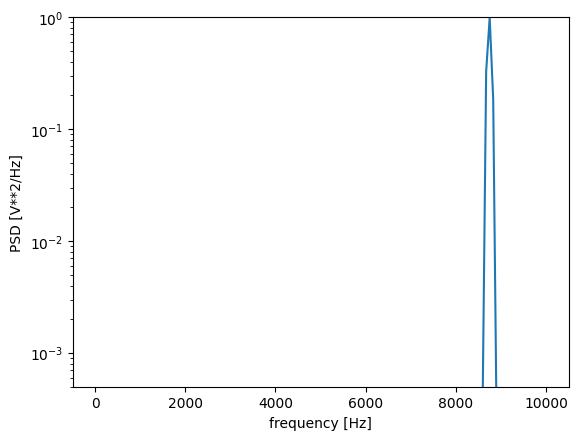

In [76]:
plt.semilogy(freq, psd)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()